<a href="https://colab.research.google.com/github/iSanoussi/Classes-and-tests/blob/main/Stress_test_sort.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

A = np.random.randint(0,10, 20)

In [ ]:
print(A)
print(sorted(A))

[6 2 6 9 2 7 6 7 2 3 5 1 0 1 5 6 3 0 9 9]
[0, 0, 1, 1, 2, 2, 2, 3, 3, 5, 5, 6, 6, 6, 6, 7, 7, 9, 9, 9]


In [ ]:
def my_sort(B):
  A = B.copy()
  n = len(A)


  for i in range(n):
    minim = A[i]
    ind = i
    for j in range(i,n):
      if A[j] < minim :
        ind  = j
        minim = A[j]
    A[i], A[ind] = A[ind], A[i]
  return A



In [ ]:
my_sort(A)

array([0, 0, 1, 1, 2, 2, 2, 3, 3, 5, 5, 6, 6, 6, 6, 7, 7, 9, 9, 9])

In [ ]:
A

array([0, 1, 1, 1, 2, 2, 4, 4, 4, 4, 5, 5, 6, 7, 8, 8, 9, 9, 9, 9])

# Objectif : rediger un stress test
- générer une boucle while() (infinie)
- générer une liste aléatoire
- comparer sorted(liste) et my_sort(liste)
- renvoyer un message d'erreur si le résultat est différent
- continuer si résultat est identique (attention aux types de liste)
- éventuellement ajouter un compteur de cas corrects

In [ ]:
i = 0
while(True):
  i += 1
  liste = np.random.randint(0, 10, 100)

  if (sorted(liste) == list(my_sort(liste))):
    print(str(i) + " exemples corrects")
    continue
  print("probleme avec " + str(liste))
  break

# Comparer l'efficacité algorithmique de sorted et my_sort

In [ ]:
from time import time
temps = []
longueurs = []
for i in range(1, 250):
  T = 0
  for _ in range(5):
    liste = np.random.randint(0, 10, i)
    t1 = time()
    my_sort(liste)
    t2 = time()
    T += t2 - t1
  longueurs.append(i)
  temps.append(T/5)

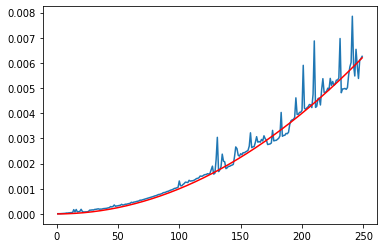

In [ ]:
import matplotlib.pyplot as plt
fit = lambda t : 1e-7*t**2

plt.plot(longueurs, temps)
plt.plot(longueurs, fit(np.array(longueurs)  ) , c = 'r')

In [ ]:
fit(10000)

10.0

In [ ]:
liste = np.random.randint(0, 10, 10000)
t1 = time()
my_sort(liste)
t2 = time()

In [ ]:
t2 - t1

10.021228790283203

In [ ]:
from time import time
temps = []
longueurs = []
for i in range(1, 500):
  T = 0
  for _ in range(5):
    liste = np.random.randint(0, 10, i)
    t1 = time()
    sorted(liste)
    t2 = time()
    T += t2 - t1
  longueurs.append(i)
  temps.append(T/5)

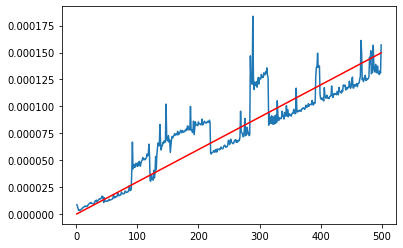

In [ ]:
import matplotlib.pyplot as plt
fit = lambda t : 0.3e-6*t

plt.plot(longueurs, temps)
plt.plot(longueurs, fit(np.array(longueurs)  ) , c = 'r')

In [ ]:
fit(10000)

0.003

In [ ]:
liste = np.random.randint(0, 10, 10000)
t1 = time()
sorted(liste)
t2 = time()

In [ ]:
t2 - t1

0.00509333610534668

In [ ]:
def commun(liste_1, liste_2):
  somme = 0
  for i in range(max(len(liste_1), len(liste_2))):
    if i >= len(liste_1):
      somme += liste_2[i]
    elif i >= len(liste_2):
      somme += liste_1[i]
    else :
      somme += liste_1[i] + liste_2[i]
  return somme


In [ ]:
commun([1, 4, 5], [3, 2, 6, 7, 4])

32

In [ ]:
import numpy as np
import time

temps = []
longueurs = []
for i in range(100, 10001, 100):
  X = np.random.randint(0,10, i)
  Y = np.random.randint(0,10, i)
  t1 = time.time()
  commun(X, Y)
  t2 = time.time()
  longueurs.append(i)
  temps.append(t2 - t1)

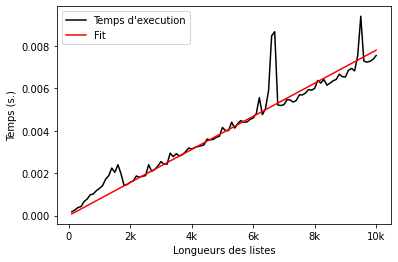

In [ ]:
from matplotlib import pyplot as plt
f = lambda t : 0.78e-6*t

plt.plot(longueurs, temps, label = "Temps d'execution", c = 'black')
plt.plot(longueurs, f(np.array(longueurs)), label = "Fit", c= 'r')
plt.legend()
plt.xlabel("Longueurs des listes")
plt.ylabel("Temps (s.)")
plt.xticks([0, 2000, 4000, 6000, 8000, 10000], [0, "2k", "4k","6k","8k","10k"])

plt.show()